### 1D Linear Convection

Propogation of a wave with constant speed $c$, without change in shape

$\frac{\partial u}{\partial  t} + c \frac{\partial u}{\partial  x} = 0$

where:

- $u(x,t)$ is the function of the wave
- $c$ is the convection speed
- $x$ is spacial coordinate
- $t$ is time

$\frac{\partial u}{\partial t}$ - tells us how $u$ evolves over time, given fixed $x$

$\frac{\partial u}{\partial  x}$ - tells us how u varies across space at a fixed time

if $u(x,y)$ represents smoke concentration,
- $\frac{\partial u}{\partial t}$ represents how concentration at a point changes over time
- $\frac{\partial u}{\partial  x}$ represents how smoke concentration changes from one location to another

#### Discretize Equation

By the defination of derivative (forward difference):

$\frac{\partial u}{\partial x} \approx \frac{u(x + \Delta x) - u(x)}{\Delta x}$

So we can substitute our equation as, where $n$, $n+1$ are two consecutive time steps, and $i$, $i + 1$ are two neighboring points in discretized $x$:

$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_{i}^{n} - u_{i-1}^n}{\Delta x} = 0$

In this example, we use forward difference for the time derivative, and backwards difference for the sapce derivative.

Given intial conditions, our only unknown is $u_i^{n+1}$, so rearranging we get:

$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x} (u_{i}^{n} - u_{i-1}^n) $

In [23]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


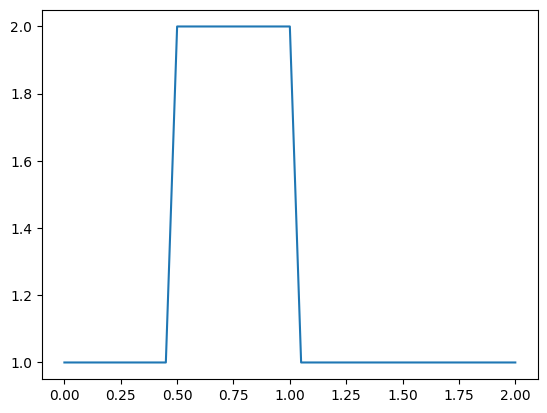

In [24]:
nx = 41 # 41 grid points
dx = 2 / (nx - 1) # spaced 2 units apart
nt = 25 # number of timesteps
dt = 0.025
c = 1 # wave speed

# intial conditions

u = np.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print(u)

plt.plot(np.linspace(0, 2, nx), u);

$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x} (u_{i}^{n} - u_{i-1}^n) $

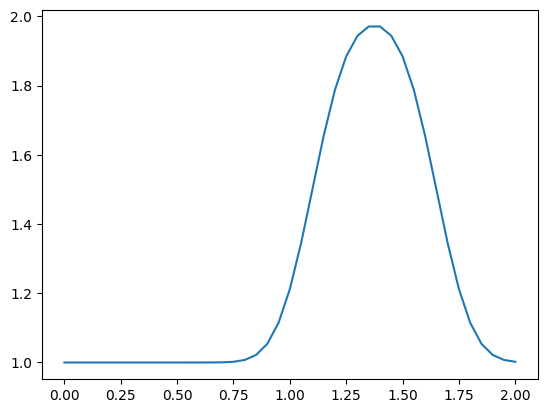

In [25]:
u = np.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2 

un = np.ones(nx)

iterations = []

for n in range(nt):
    iterations.append(u.copy())
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
plt.plot(np.linspace(0, 2, nx), u)

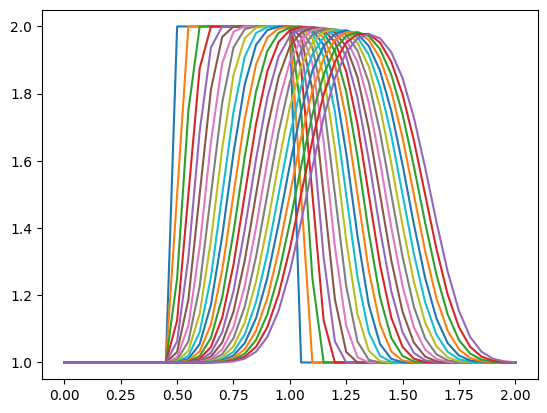

In [26]:
for i in iterations:
    plt.plot(np.linspace(0, 2, nx), i)